In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np

In [3]:
# need to get train, val and test data
import sys
sys.path.append('../')
from src.data import train_val_test_split
use_mda = True
numb_train_samples = 8_000
train_structs, val_structs, test_structs = train_val_test_split(mda=use_mda,num_files=None)

In [8]:
from src.data import get_descriptor_and_labels
train_x, train_y, label_mapping = get_descriptor_and_labels(train_structs,num_samples_per_type=numb_train_samples)
val_x, val_y, _ = get_descriptor_and_labels(val_structs, num_samples_per_type=2_500)
test_x, test_y, _ = get_descriptor_and_labels(test_structs, num_samples_per_type=2_500)

# need to convert one-hot vectors to integers
train_y = np.argmax(train_y,axis=1)
val_y = np.argmax(val_y,axis=1)
test_y = np.argmax(test_y,axis=1)

In [9]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_x)
scaled_train_x = scaler.transform(train_x)
scaled_val_x = scaler.transform(val_x)
scaled_test_x = scaler.transform(test_x)

In [10]:
from src.plotting import plot_confusion_matrix

## Logistic Regression

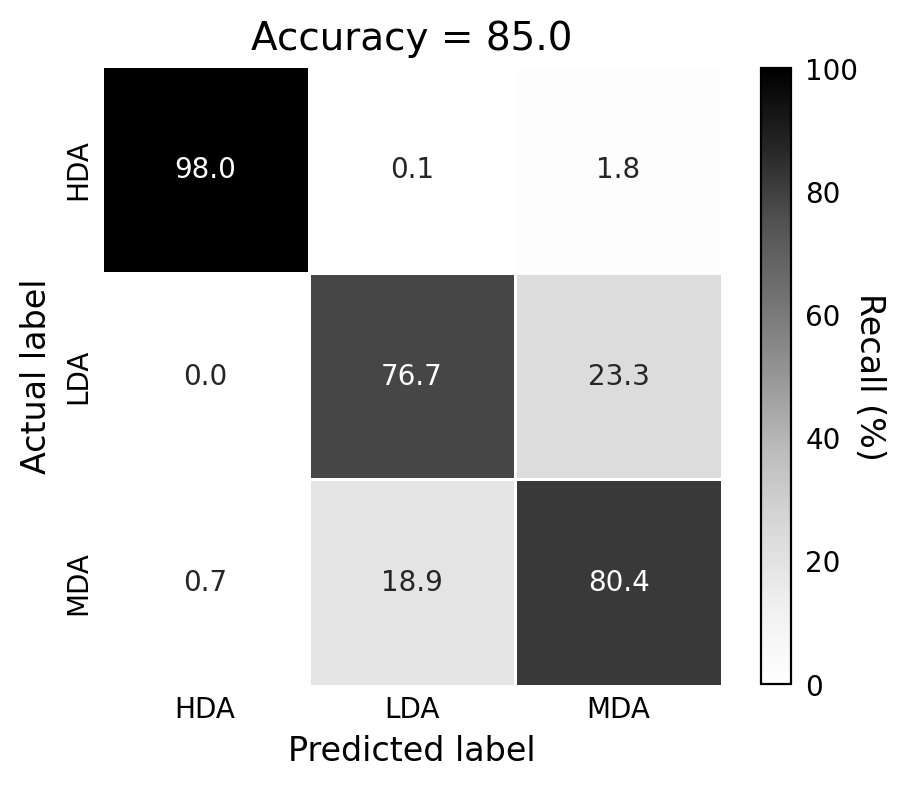

In [17]:
from sklearn.linear_model import LogisticRegression
%config InlineBackend.figure_format = 'retina'

model = LogisticRegression(random_state=0,max_iter=200)
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y)

## Naive Bayes

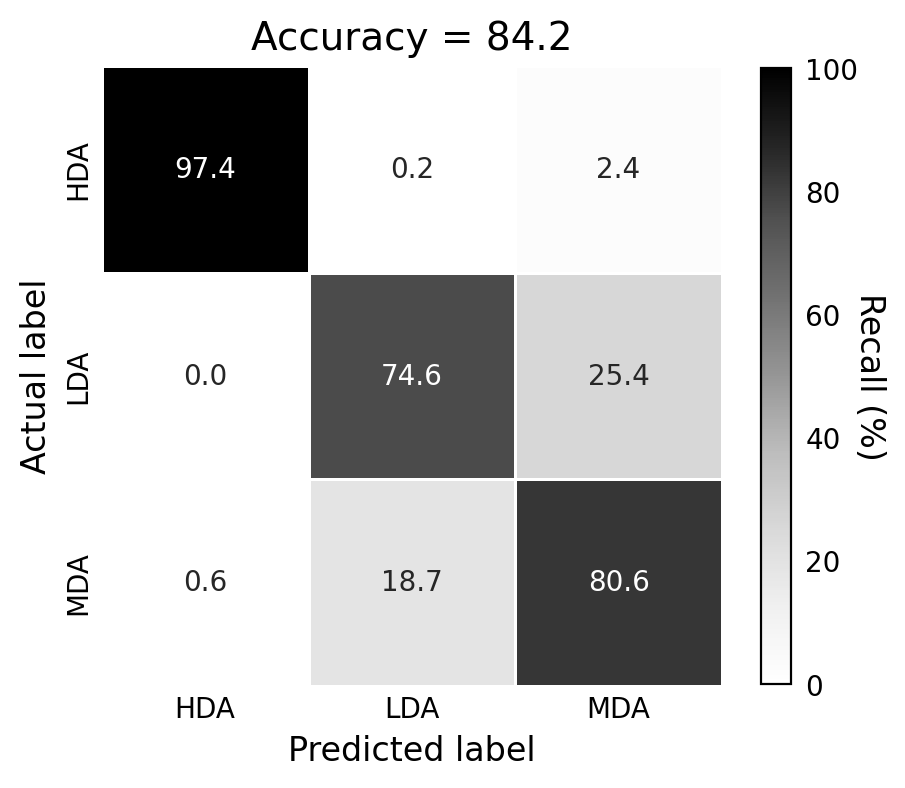

In [18]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y)

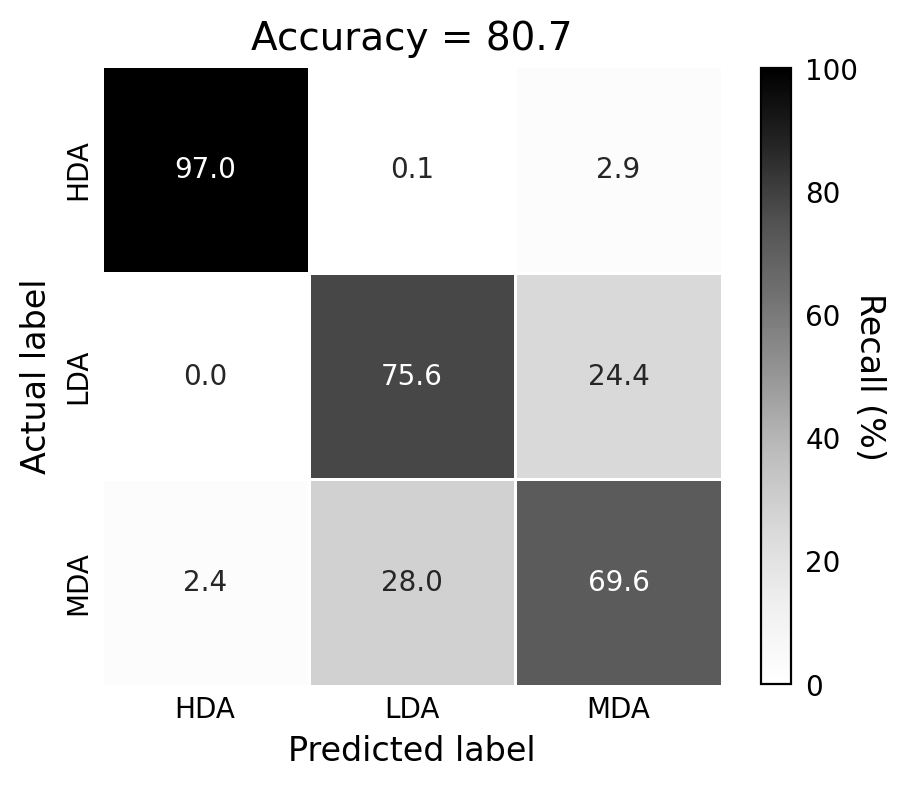

In [19]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y)

## K-nearest neighbours

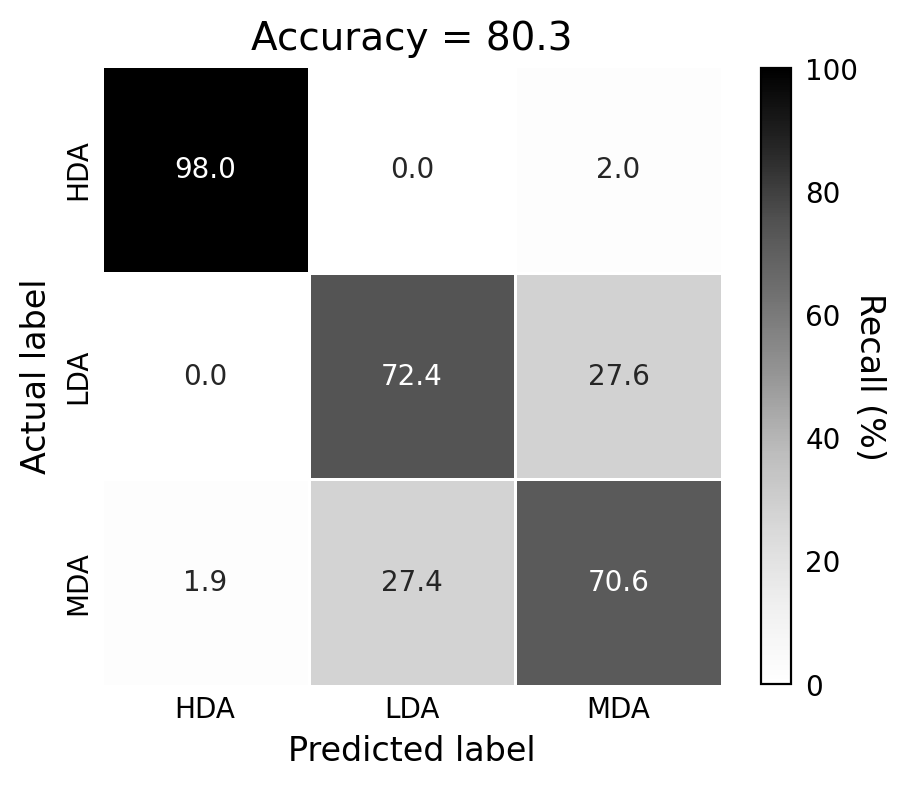

In [20]:
from sklearn.neighbors import KNeighborsClassifier
# for n in [2,4,8,16,32]:
model = KNeighborsClassifier(n_neighbors=5)
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y)

## Decision Trees

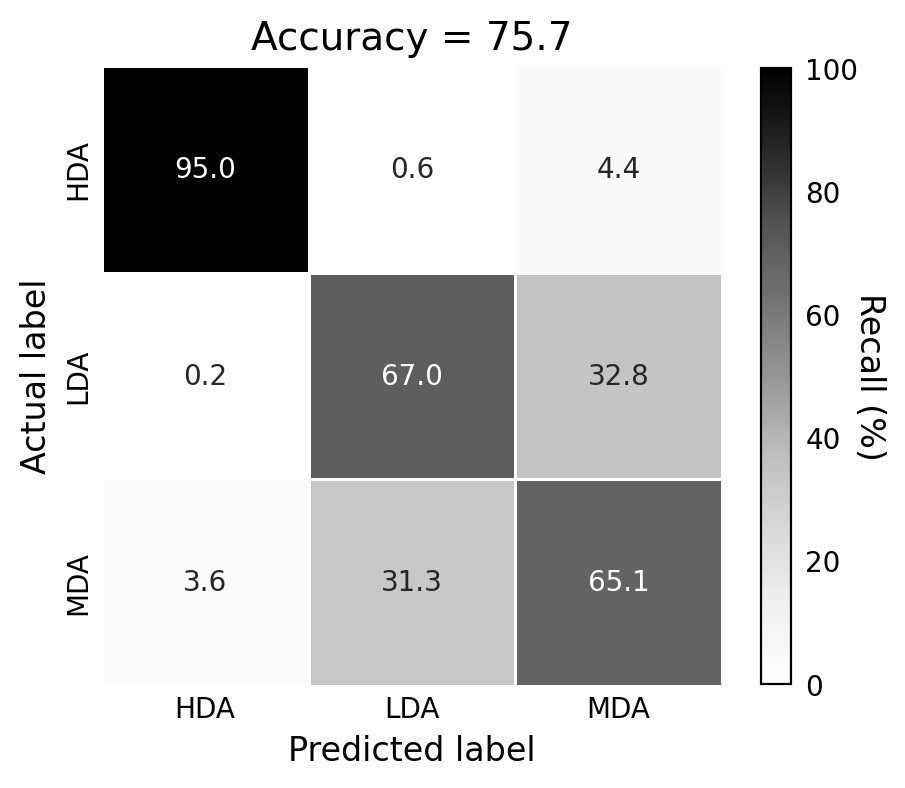

In [21]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y)

## Random Forest

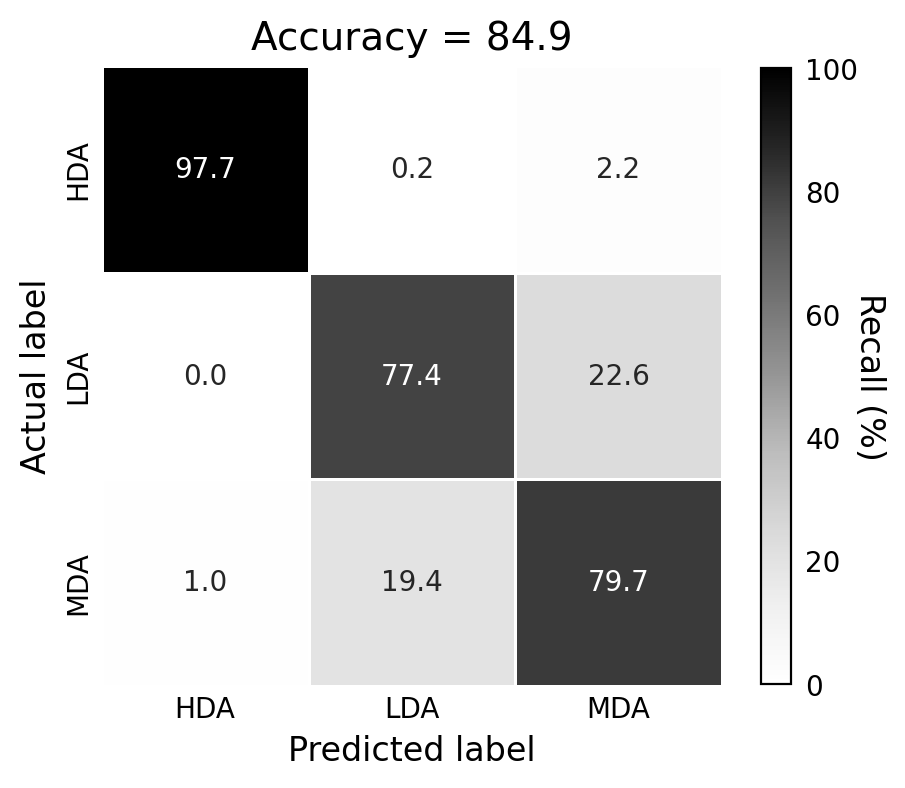

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0,n_estimators=300)
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y)

## Support Vector Machines

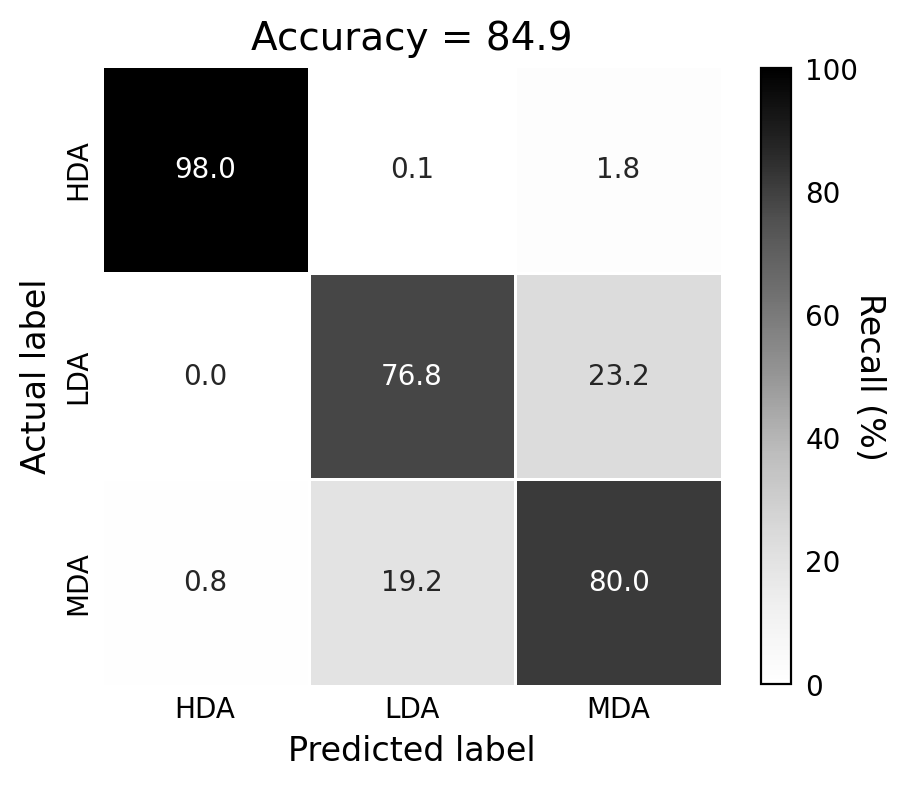

In [23]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y)

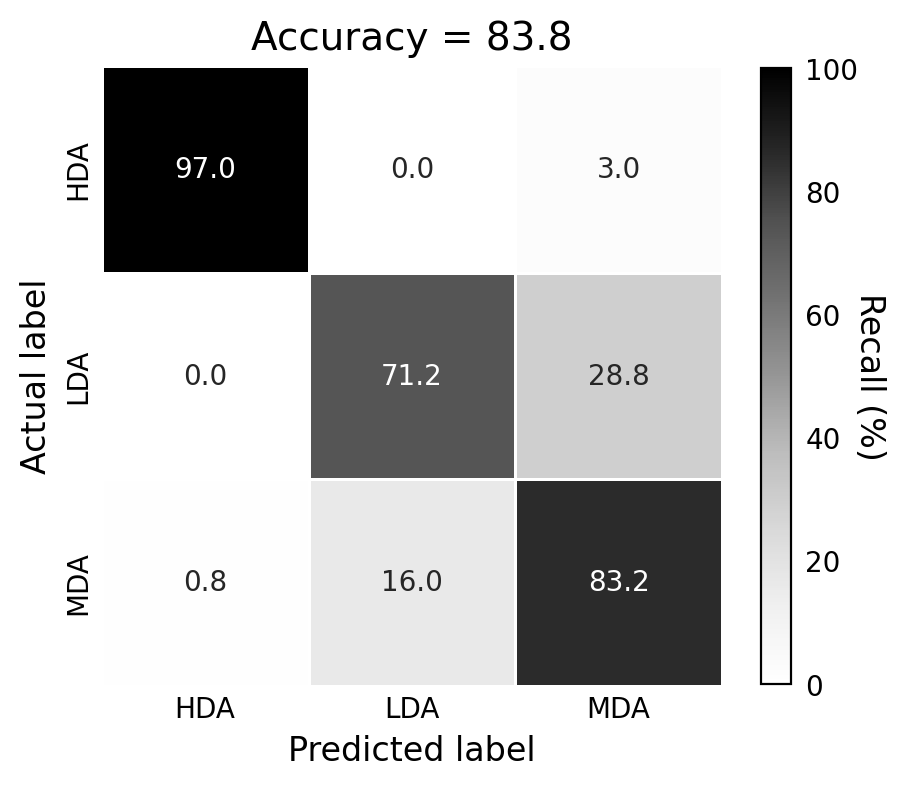

In [24]:
model = SVC(kernel='poly')
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y)

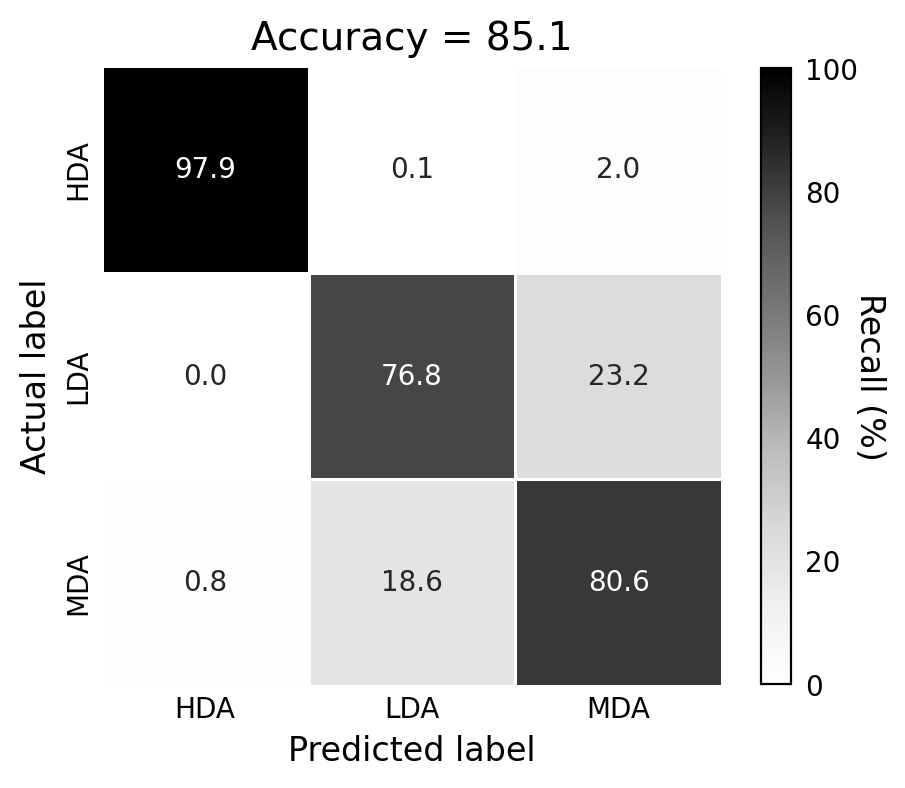

In [25]:
model = SVC(kernel='rbf')
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y)